In [1]:
# Imports
import sys
sys.path.insert(0, '/home/crhea/Documents/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt

2024-04-25 18:52:37.711184: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 18:52:37.713724: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 18:52:37.743859: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 18:52:37.743929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 18:52:37.744927: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/crhea/Documents/LUCI/'
cube_dir = '/home/crhea/Documents/LUCI_test'  # Path to data cube
cube_name = 'NGC628_SN3'  # don't add .hdf5 extension
object_name = 'NGC628'
redshift = 0.000133
resolution = 1000 # The actual resolution is 400, but we don't have machine learning algorithms for that resolution, so we use 1000

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|██████████| 9/9 [00:01<00:00,  5.70it/s]


In [4]:
cube.create_deep_image()

Existing deep frame extracted from hdf5 file.


In [5]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum

100%|██████████| 2064/2064 [00:00<00:00, 4890.11it/s]


2024-04-25 18:52:45.281977: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


<AxesSubplot:xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

<Figure size 640x480 with 0 Axes>

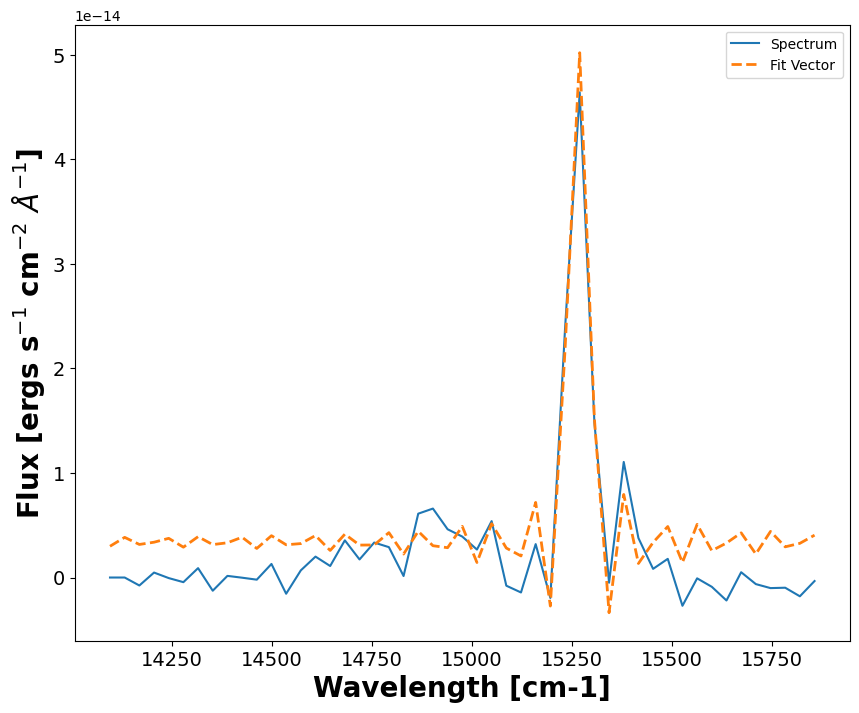

In [6]:
# Fit!
axis, sky, fit_dict = cube.fit_spectrum_region(
                                    ['NII6548', 'Halpha', 'NII6583'],#, 'SII6716', 'SII6731'],
                                    #['Halpha'],    
                                    'sincgauss',
                                    #[1], [1],
                                    [1,1,1], [1,1,1],
                                    #[1,1,1,1,1], [1,1,1,1,1],
                                    region=cube_dir+'/reg1.reg', bkg=bkg_sky)
lplt.plot_fit(axis, sky, fit_dict['fit_vector'])

The fit isn't bad given the low resolution of the cube!

In [7]:
fit_dict

{'fit_sol': array([2.75189025e-15, 1.53018092e+04, 9.78930059e-01, 4.41290110e-14,
        1.52673715e+04, 9.76726914e-01, 8.25567737e-15, 1.52195756e+04,
        9.73669176e-01, 3.41501130e-15]),
 'fit_uncertainties': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'amplitudes': [2.751890245429915e-15,
  4.412901098863723e-14,
  8.255677367181556e-15],
 'fluxes': [6.510980825097e-14, 1.0440934120082377e-12, 1.953294247529101e-13],
 'flux_errors': [0.0, 0.0, 0.0],
 'chi2': 0.3530597125019831,
 'velocities': [-588.5510150106509, -588.5510150106383, -588.5510150106422],
 'sigmas': [19.179130752553622, 19.179130752553615, 19.17913075255362],
 'vels_errors': [0.0, 0.0, 0.0],
 'sigmas_errors': [0.0, 0.0, 0.0],
 'axis_step': 46.167629656499976,
 'corr': 1.0598056937097515,
 'continuum': 3.4150113048073673e-15,
 'continuum_error': 0.0,
 'scale': 4.718254032866851e-14,
 'vel_ml': -200.63182067871094,
 'vel_ml_sigma': 0,
 'broad_ml': 63.9449348449707,
 'broad_ml_sigma': 0,
 'fit_vector': arra